In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import numpy as np
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../src'))

from data_preparation_utils import load_data, drop_and_save_columns, clean_text, filter_rows_by_column_value

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [7]:
df = load_data(r"C:\Users\idosc\Documents\GitHub\french_resturants\data\processed\french_resturants_only.csv")

In [9]:
# Keep the first 29 columns (indices 0 to 28) and the last column (index -1)
df_autovis = df.iloc[:, list(range(29)) + [-1]]

df_autovis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155288 entries, 0 to 155287
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   restaurant_link          155288 non-null  object 
 1   restaurant_name          155288 non-null  object 
 2   original_location        155288 non-null  object 
 3   region                   155286 non-null  object 
 4   province                 136932 non-null  object 
 5   city                     155158 non-null  object 
 6   address                  155288 non-null  object 
 7   latitude                 153359 non-null  float64
 8   longitude                153359 non-null  float64
 9   claimed                  155117 non-null  object 
 10  awards                   43250 non-null   object 
 11  popularity_detailed      144657 non-null  object 
 12  popularity_generic       144386 non-null  object 
 13  top_tags                 141597 non-null  object 
 14  pric

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 30)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  10
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    30 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
       

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
restaurant_link,object,0.000000,100,,,Possible ID column: drop before modeling step.
restaurant_name,object,0.000000,75,,,No issue
original_location,object,0.000000,9,,,No issue
region,object,0.001333,0,,,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
province,object,11.829333,0,,,"17744 missing values. Impute them with mean, median, mode, or a constant value such as 123., 58 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
city,object,0.082667,9,,,"124 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
address,object,0.000000,92,,,No issue
latitude,float64,1.241333,NA,41.370052,51.085880,"1862 missing values. Impute them with mean, median, mode, or a constant value such as 123."
longitude,float64,1.241333,NA,-5.098175,9.549946,"1862 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 904 outliers greater than upper bound (10.69) or lower than lower bound(-4.22). Cap them or remove them."
claimed,object,0.111333,0,,,"167 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"


Number of All Scatter Plots = 15


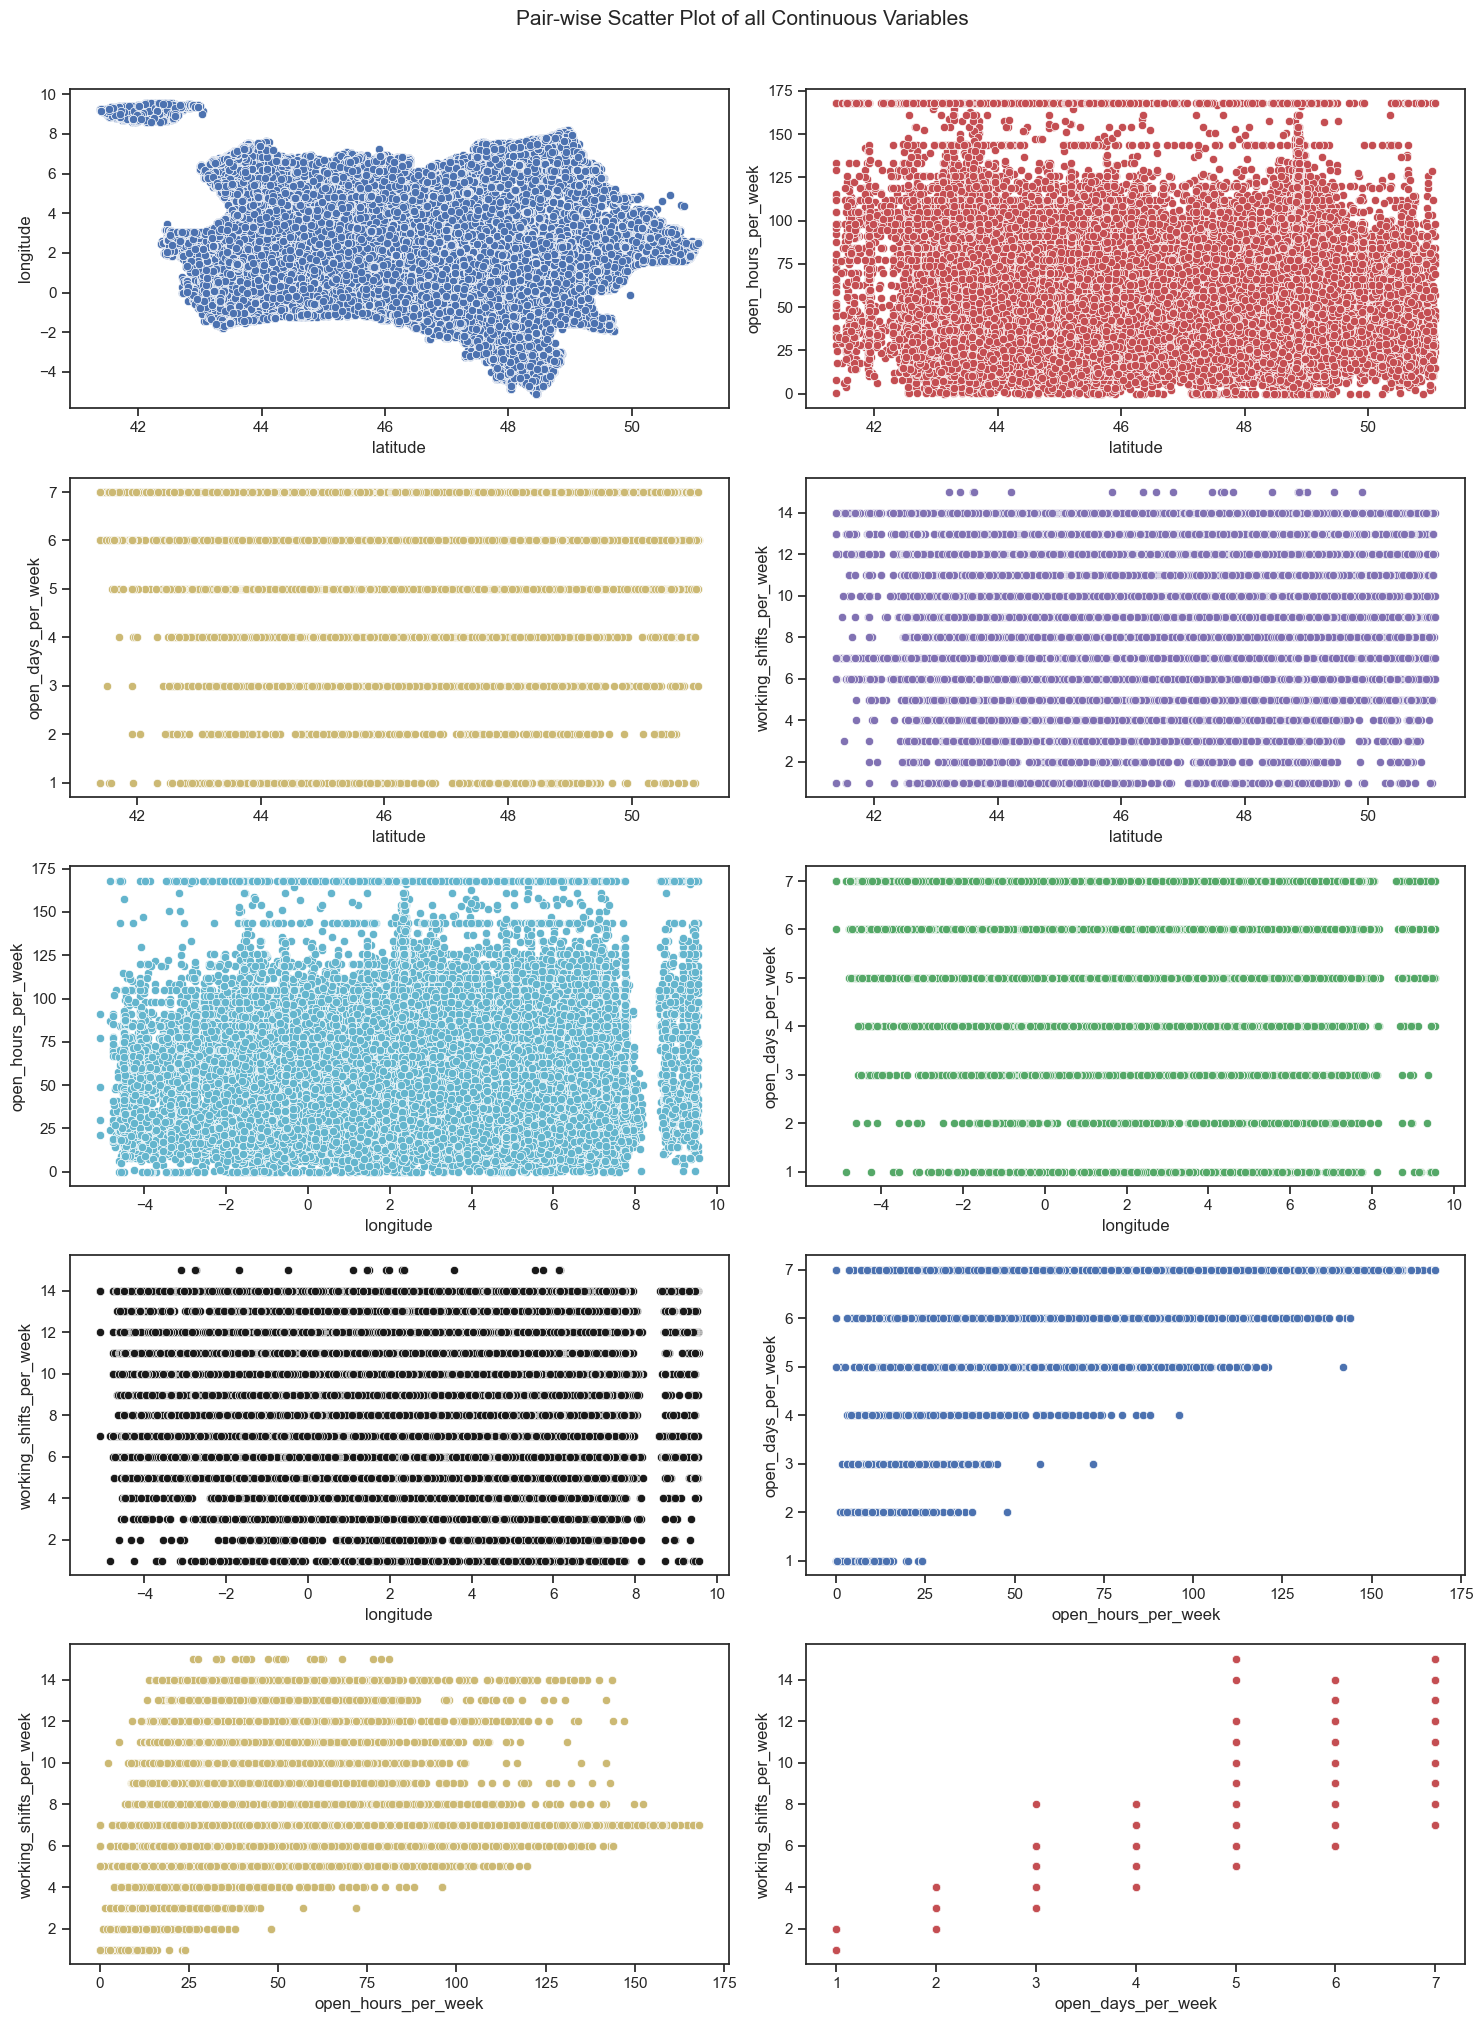

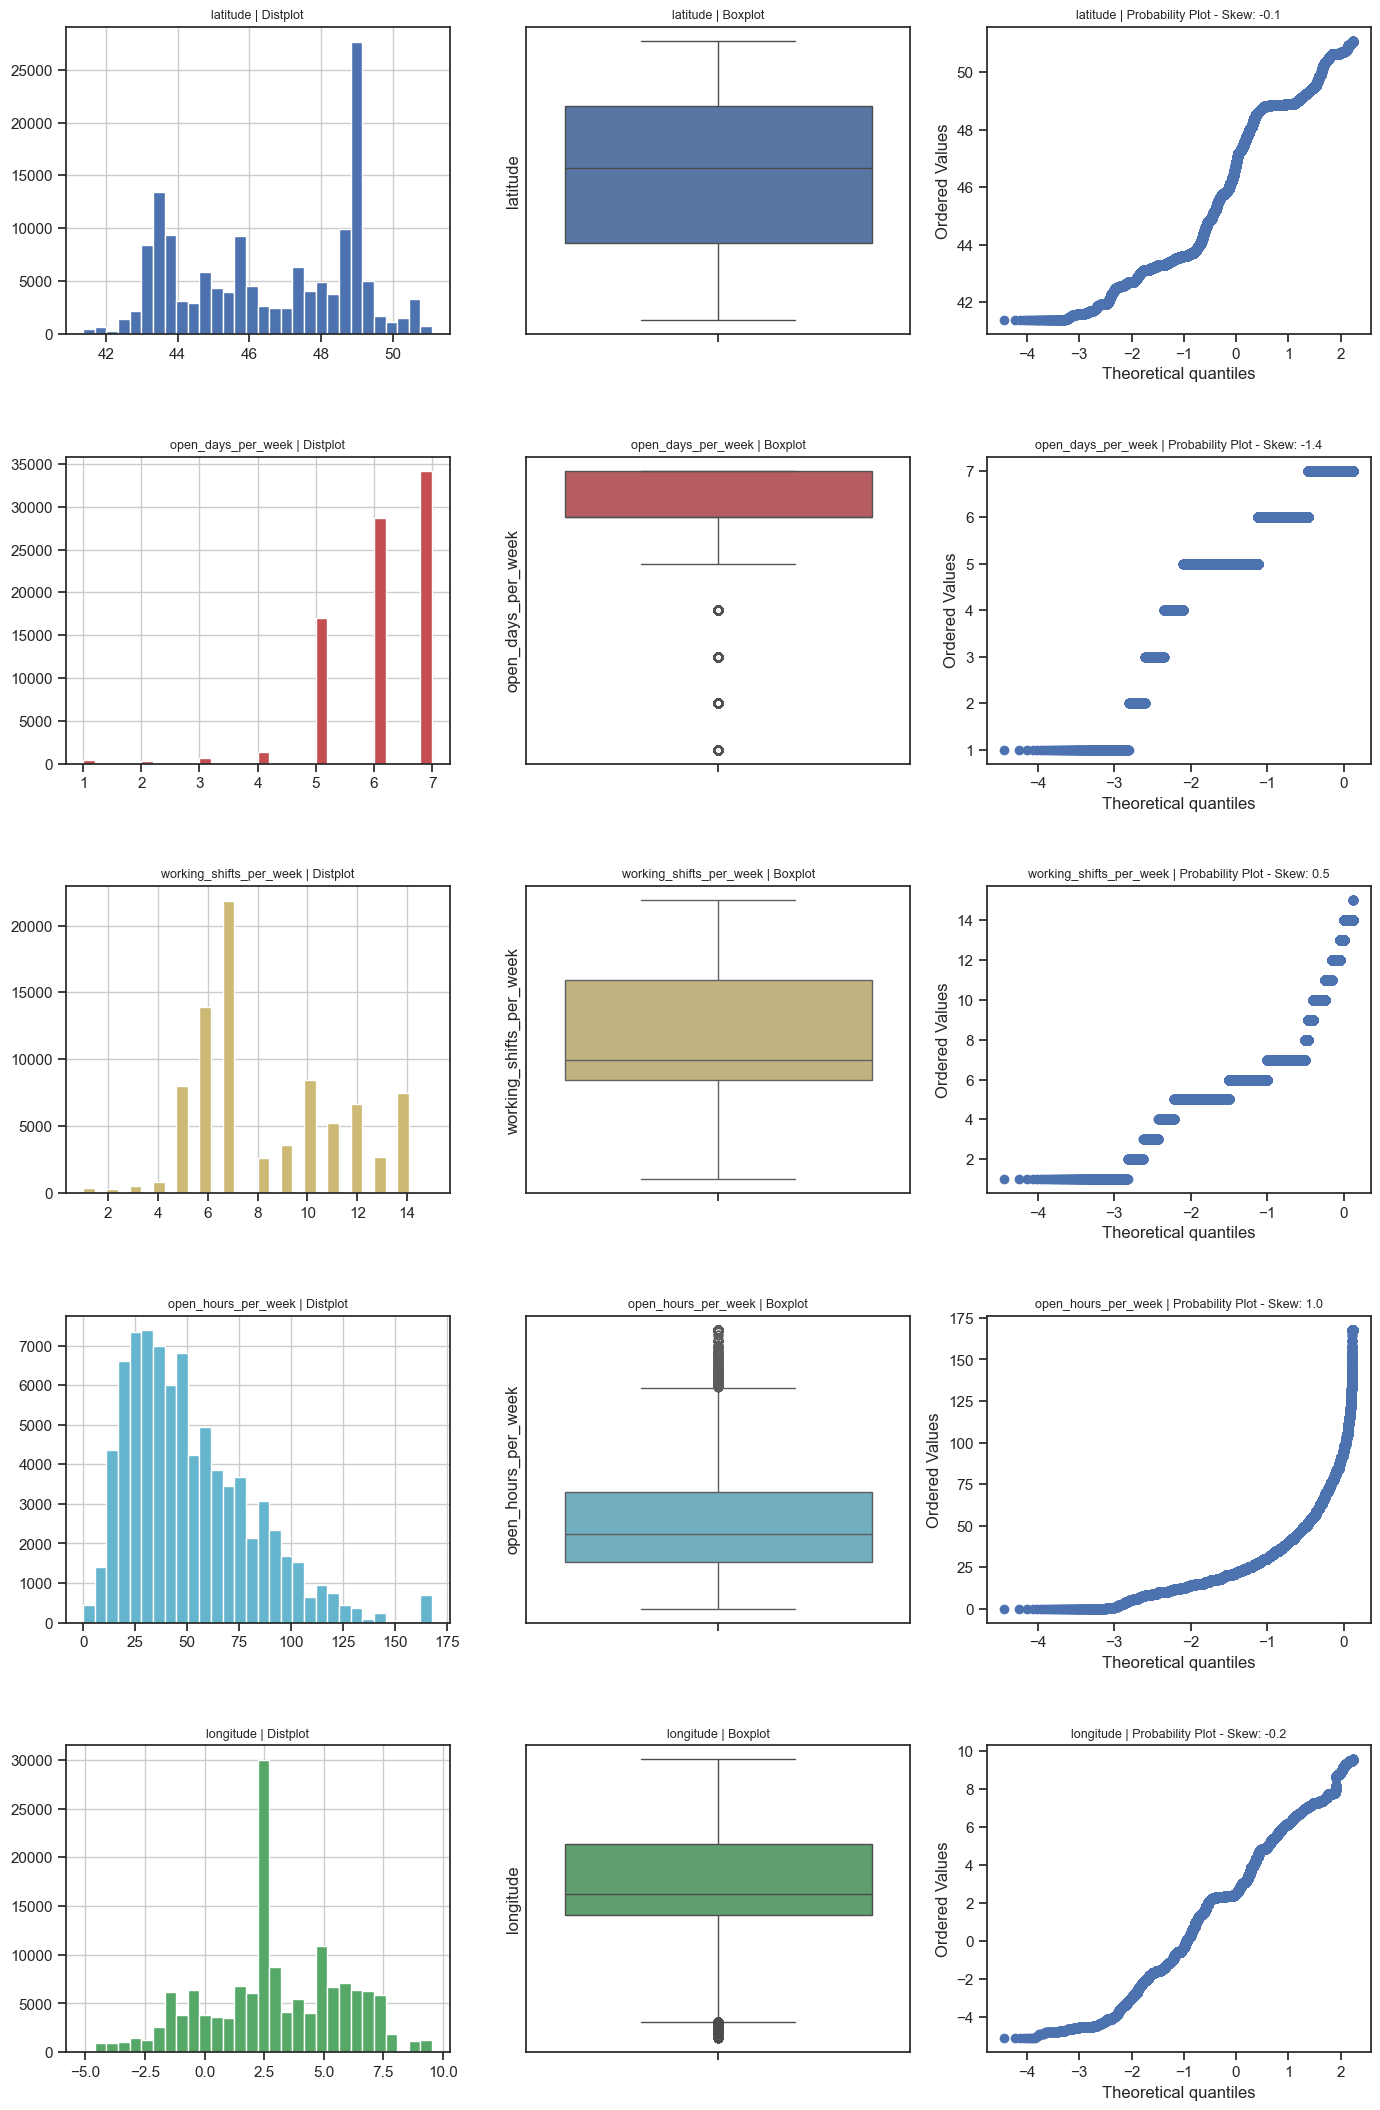

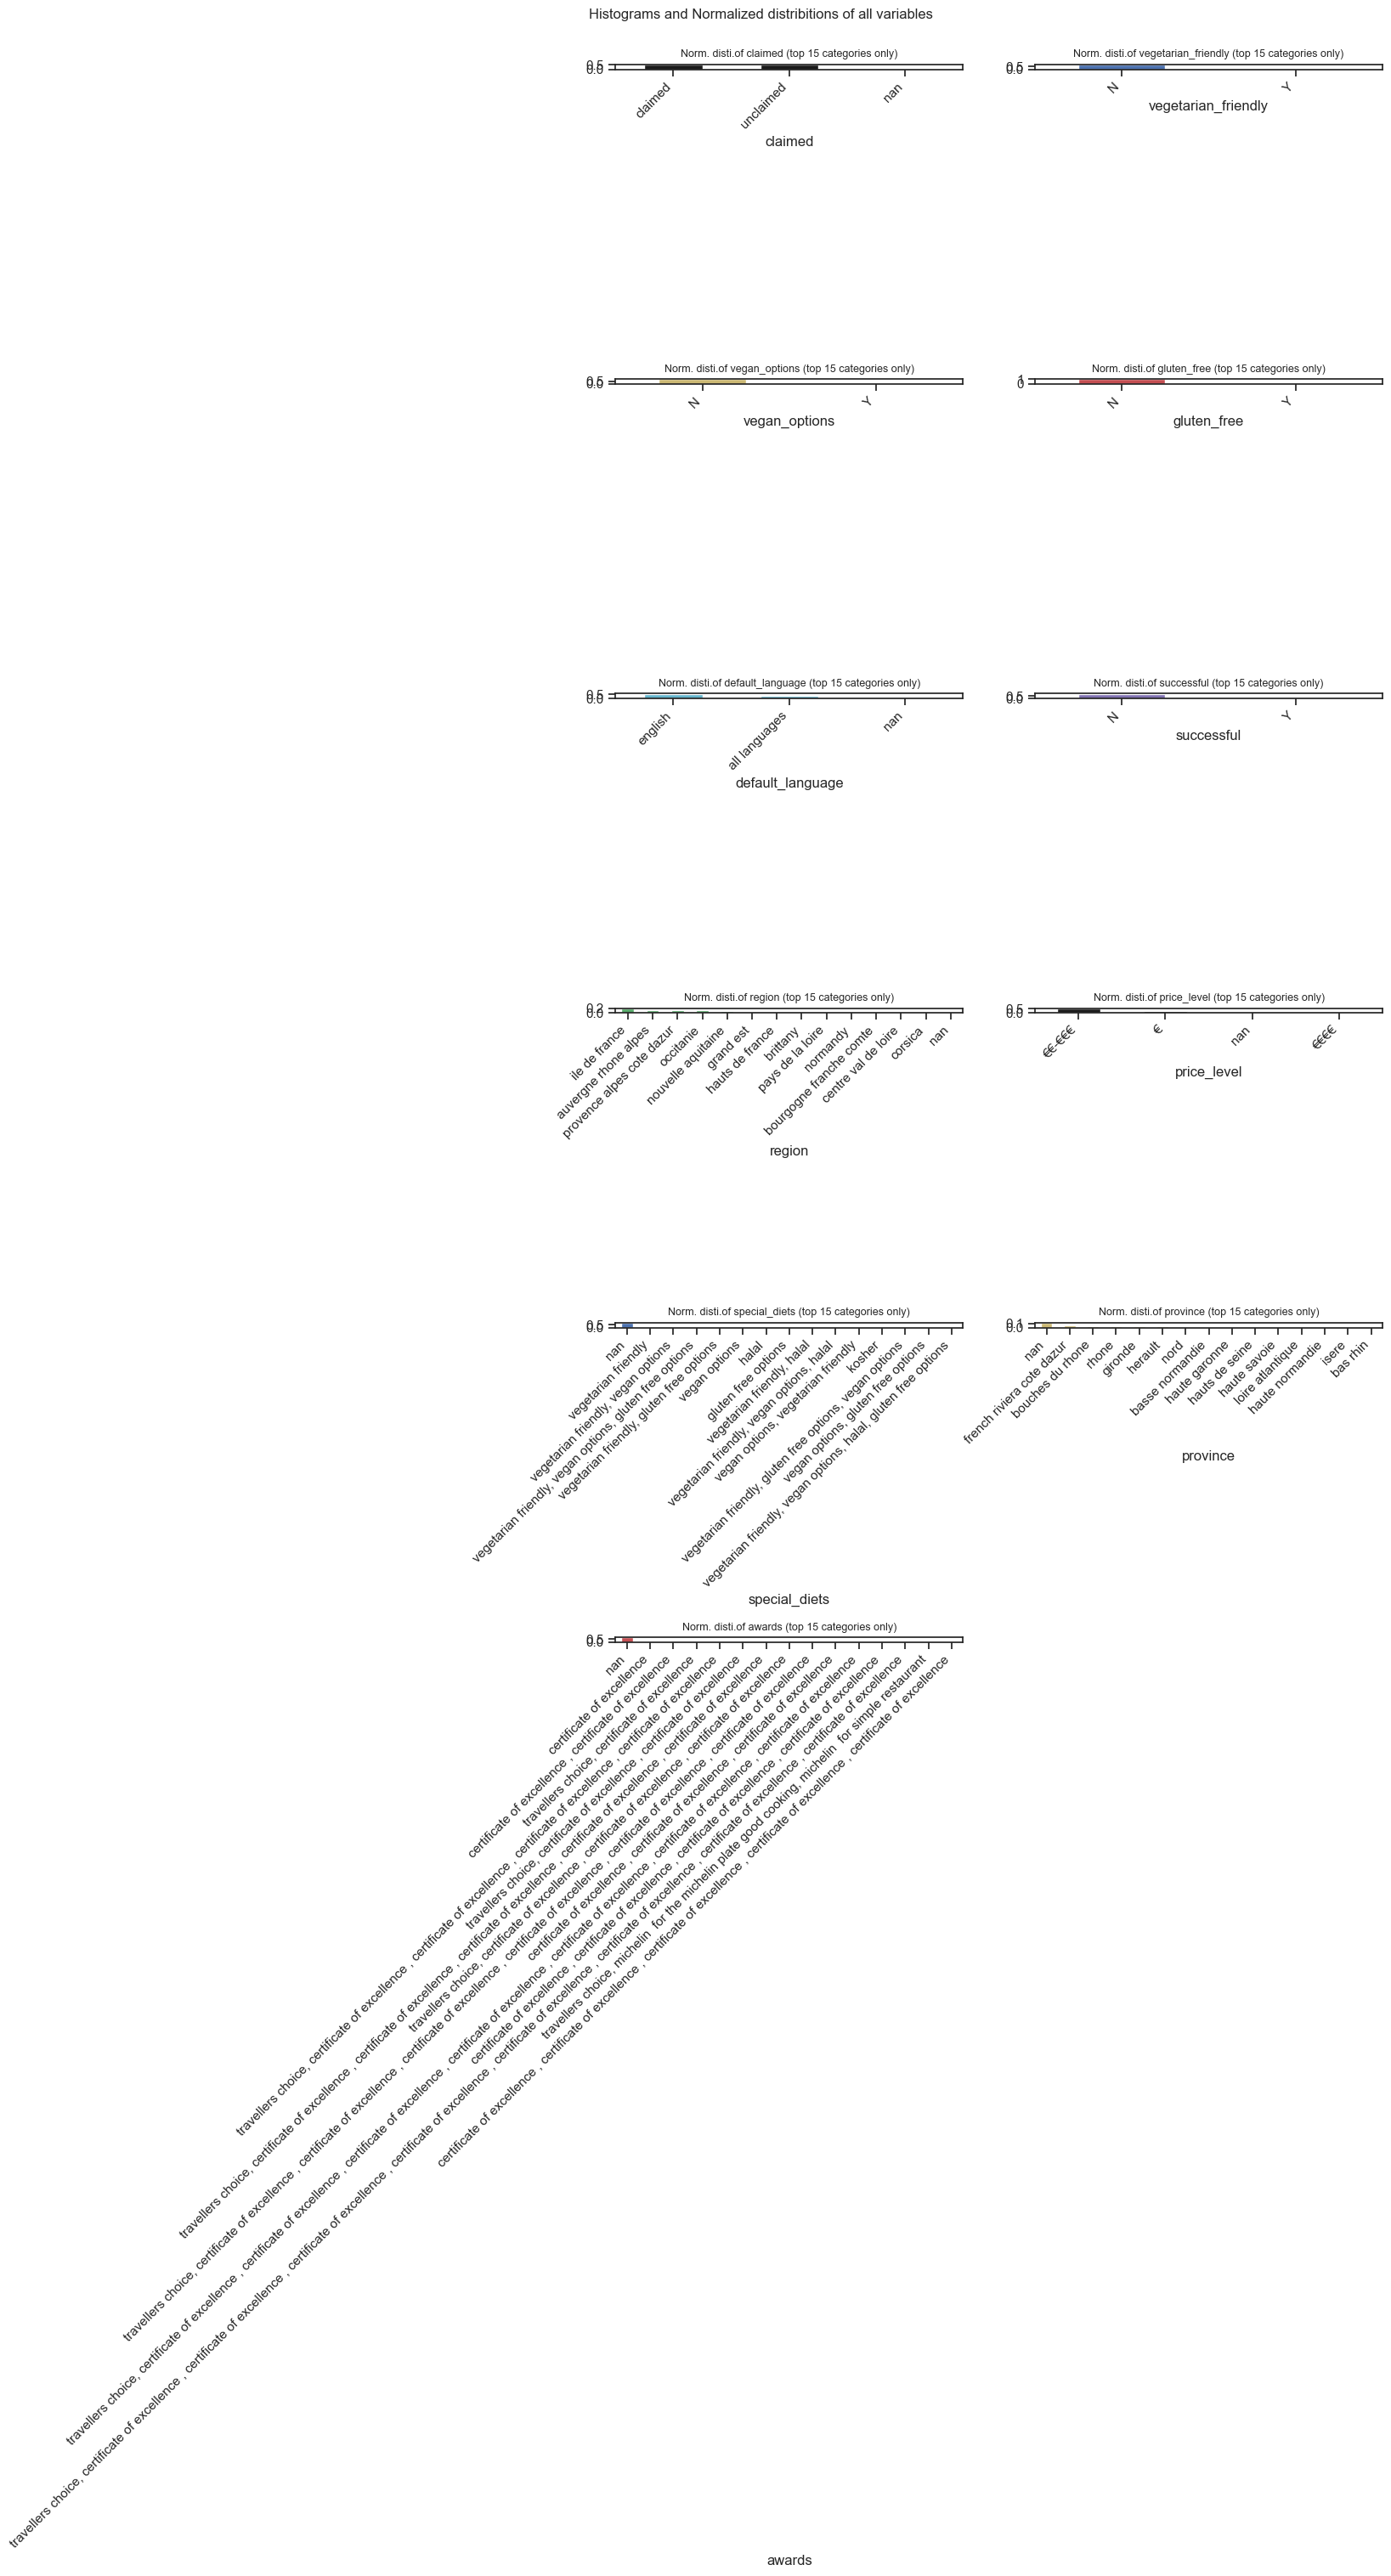

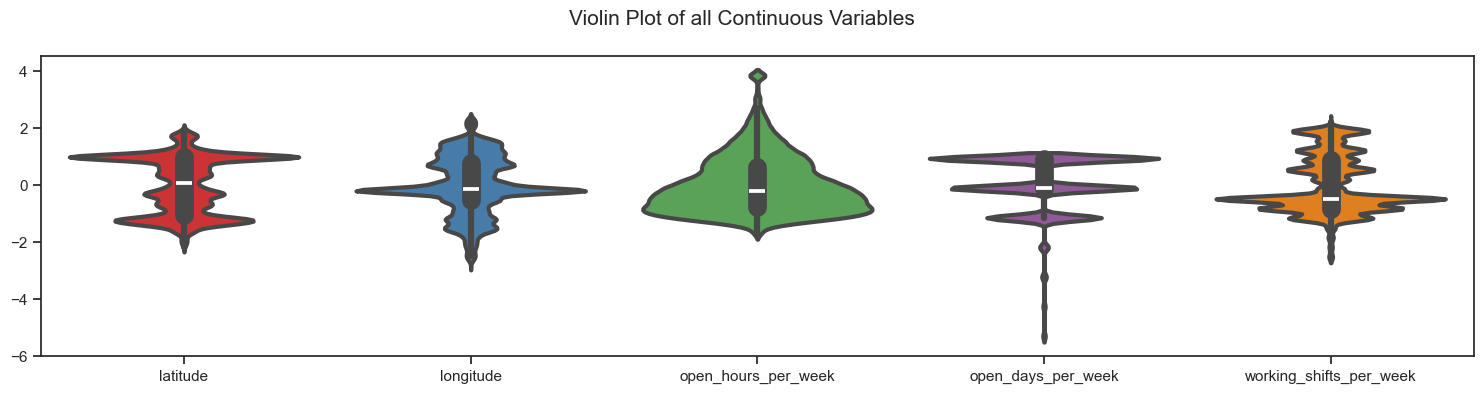

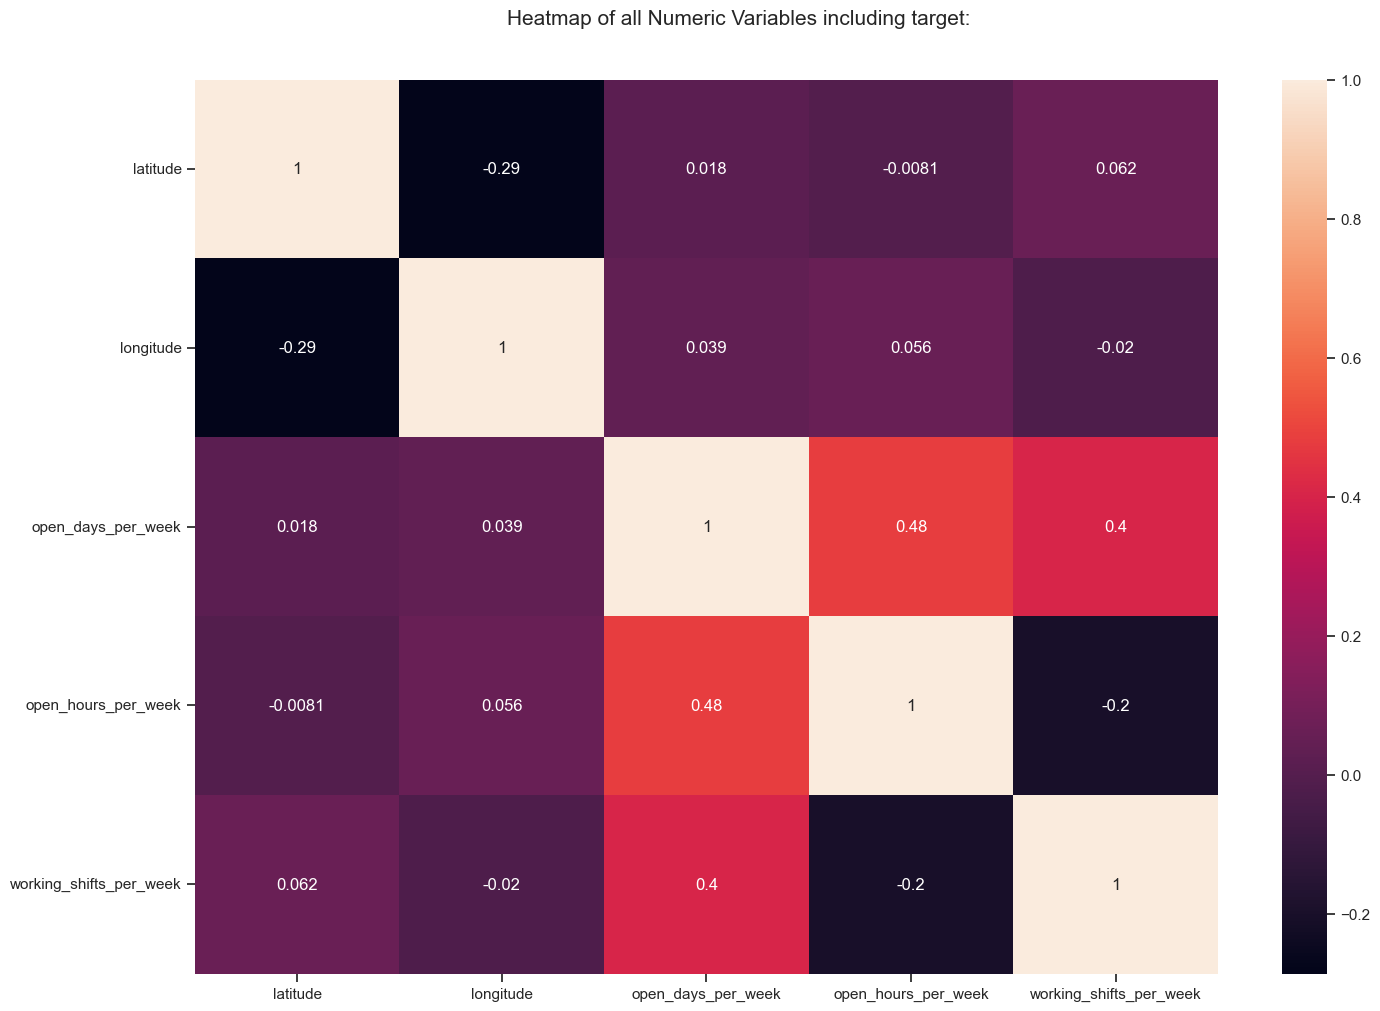

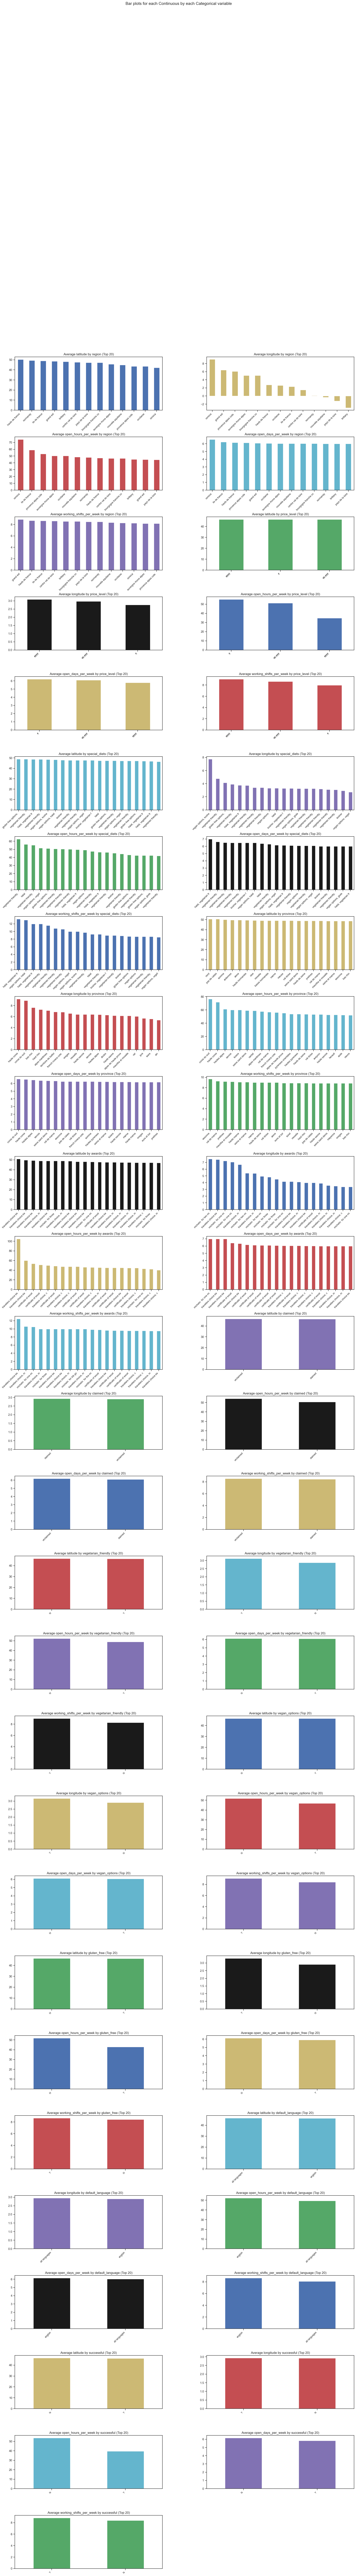

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\idosc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\idosc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\idosc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\idosc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\idosc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Could not draw wordcloud plot for restaurant_name. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for address. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for popularity_detailed. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the m

,restaurant_link,restaurant_name,original_location,region,province,city,address,latitude,longitude,claimed,awards,popularity_detailed,popularity_generic,top_tags,price_level,price_range,meals,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free,original_open_hours,open_days_per_week,open_hours_per_week,working_shifts_per_week,default_language,keywords,successful
138789,g644128-d23190093,Bistro Régent Aubagne,"[""Europe"", ""France"", ""Provence-Alpes-Cote d'Azur"", ""Bouches-du-Rhone"", ""Aubagne""]",provence alpes cote dazur,bouches du rhone,aubagne,"100 impasse des Martinets Zone Commerciale Auchan Aubagne, 13400 Aubagne France",43.297720,5.595257,unclaimed,NaN,NaN,NaN,"mid range, french",€€-€€€,€5-€40,NaN,french,NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,N
100889,g196596-d10887881,Chocolat et Macarons,"[""Europe"", ""France"", ""Occitanie"", ""Gard"", ""Ales""]",occitanie,gard,ales,"152 avenue des Freres Lumiere, 30100 Ales France",44.139500,4.092245,unclaimed,NaN,#81 of 107 Restaurants in Ales,#83 of 125 places to eat in Ales,"mid range, french, cafe",€€-€€€,€8-€30,NaN,"french, cafe",NaN,NaN,N,N,N,NaN,NaN,NaN,NaN,all languages,NaN,N
34792,g187111-d19088494,Sushi Park,"[""Europe"", ""France"", ""Bourgogne-Franche-Comte"", ""Cote d'Or"", ""Dijon""]",bourgogne franche comte,cote dor,dijon,"20 rue des Perrieres, 21000, Dijon France",47.324417,5.028975,claimed,NaN,#275 of 497 Restaurants in Dijon,#292 of 586 places to eat in Dijon,"mid range, japanese, sushi, healthy",€€-€€€,€12-€25,"lunch, dinner","japanese, sushi, healthy",NaN,NaN,N,N,N,"{""Mon"": [""11:00-14:30"", ""18:00-23:00""], ""Tue"": [""11:00-14:30"", ""18:00-23:00""], ""Wed"": [""11:00-14:30"", ""18:00-23:00""], ""Thu"": [""11:00-14:30"", ""18:00-23:00""], ""Fri"": [""18:00-23:00""], ""Sat"": [""11:00-14:30"", ""18:00-23:00""], ""Sun"": [""11:00-14:30"", ""18:00-23:00""]}",7.0,56.0,13.0,all languages,NaN,N
151519,g7594135-d7363799,L'Auberge,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Correze"", ""Saint-Angel""]",nouvelle aquitaine,correze,saint angel,"Rue Neuve Saint Angel Intersection Rue de la Chapelle, 19200 Saint-Angel France",45.503284,2.231820,unclaimed,NaN,#1 of 1 Restaurant in Saint-Angel,#1 of 1 places to eat in Saint-Angel,"cheap eats, french",€,NaN,lunch,french,NaN,"reservations, seating, table service",N,N,N,NaN,NaN,NaN,NaN,all languages,NaN,N
12343,g1165144-d2030862,L'Escale,"[""Europe"", ""France"", ""Provence-Alpes-Cote d'Azur"", ""French Riviera - Cote d'Azur"", ""La Londe Les Maures""]",provence alpes cote dazur,french riviera cote dazur,la londe les maures,"1225 boulevard Louis Bernard, 83250 La Londe Les Maures France",43.116860,6.248017,unclaimed,NaN,#45 of 53 Restaurants in La Londe Les Maures,#46 of 57 places to eat in La Londe Les Maures,"mid range, french, mediterranean",€€-€€€,NaN,"lunch, dinner","french, mediterranean",NaN,"reservations, seating, wheelchair accessible, serves alcohol, accepts credit cards, table service",N,N,N,NaN,NaN,NaN,NaN,english,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117552,g2281337-d8483418,Le Thymerais,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""Eure-et-Loir"", ""Chateauneuf-en-Thymerais""]",centre val de loire,eure et loir,chateauneuf en thymerais,"43 rue Jean Moulin, 28170 Chateauneuf-en-Thymerais France",48.579890,1.243370,unclaimed,NaN,#2 of 4 Restaurants in Chateauneuf-en-Thymerais,#2 of 4 places to eat in Chateauneuf-en-Thymerais,"cheap eats, french",€,NaN,NaN,french,NaN,"reservations, seating, table service, serves alcohol",N,N,N,NaN,NaN,NaN,NaN,english,NaN,N
9448,g1085246-d15010022,Royal Wok Grill,"[""Europe"", ""France"", ""Grand Est"", ""Meurthe-et-Moselle"", ""Frouard""]",grand est,meurthe et moselle,frouard,54390 Frouard France,48.746857,6.147500,claimed,NaN,#7 of 14 Restaurants in Frouard,#7 of 15 places to eat in Frouard,"mid range, chinese, japanese, seafood",€€-€€€,€14-€20,NaN

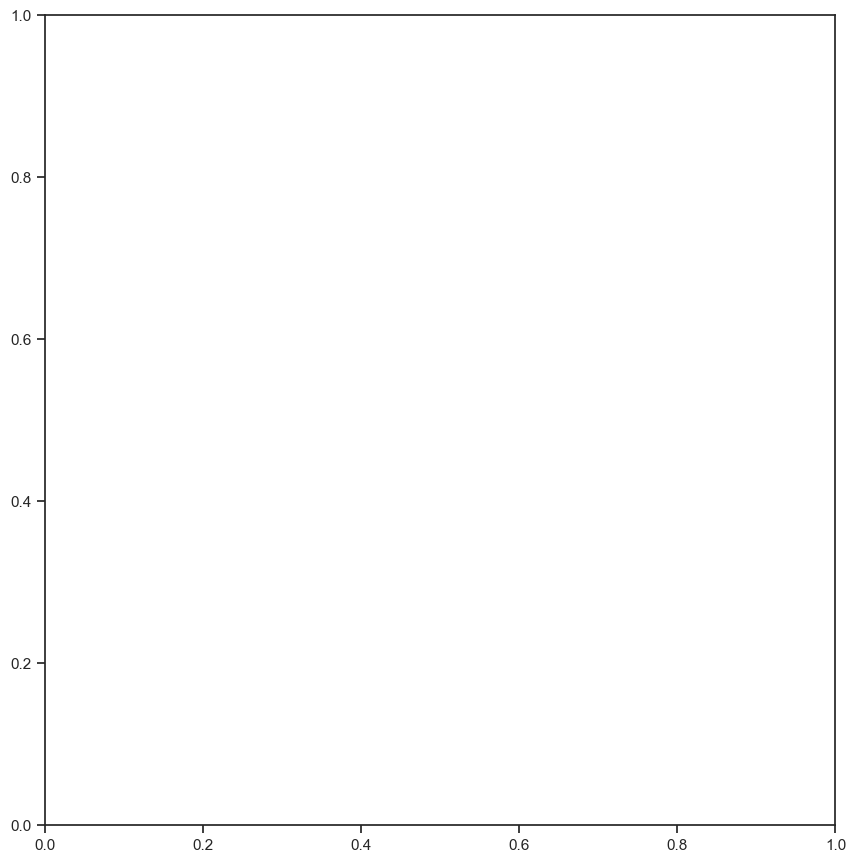

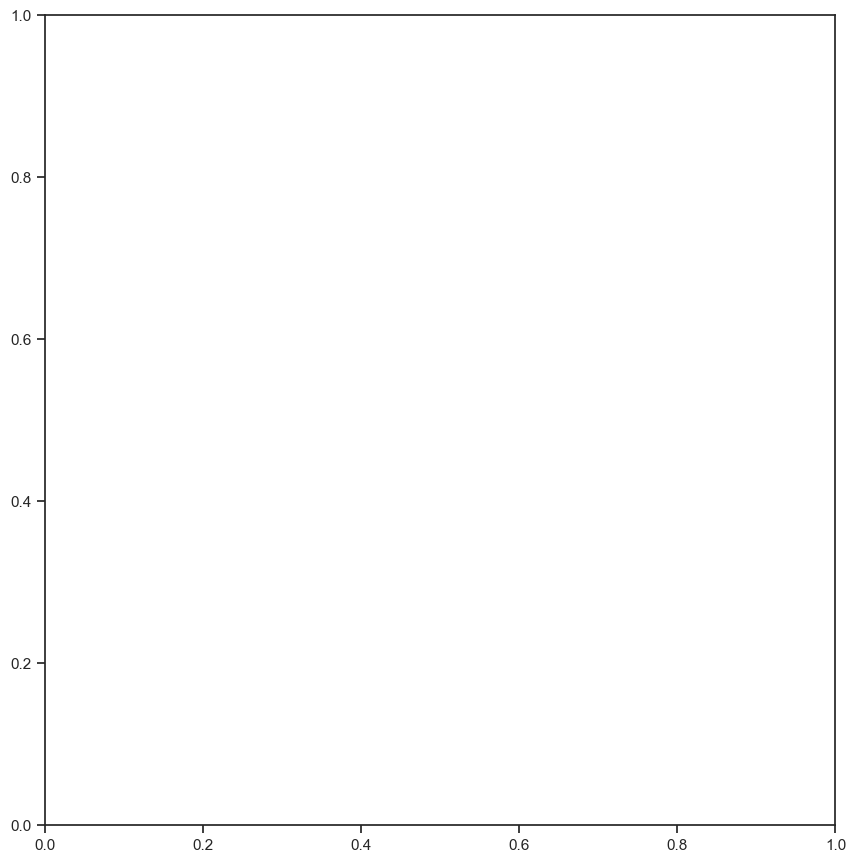

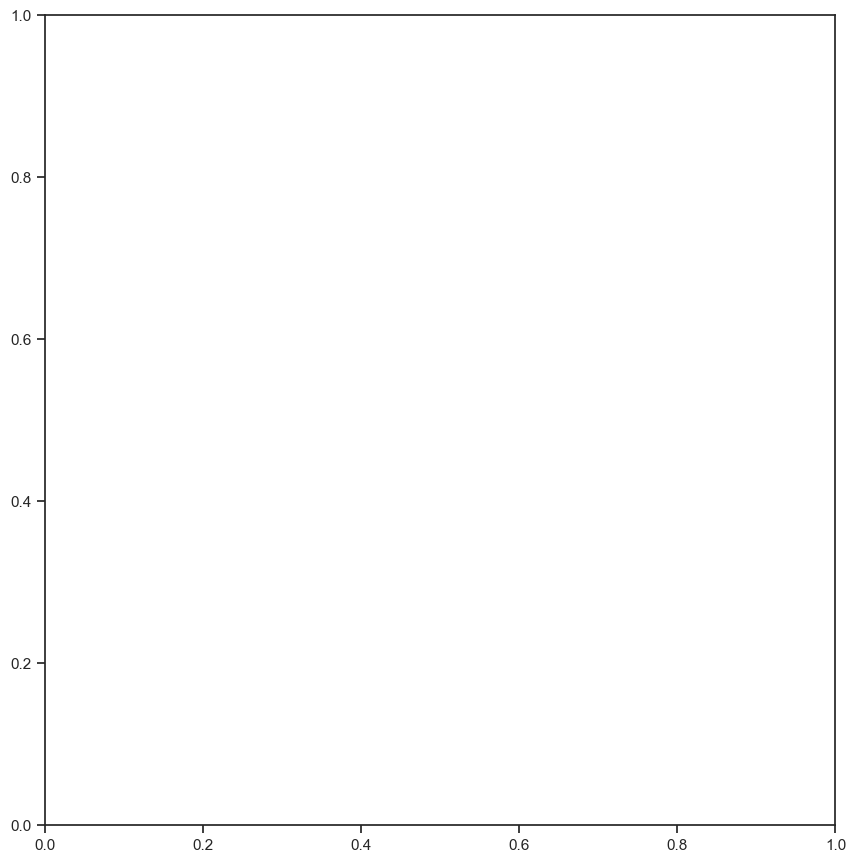

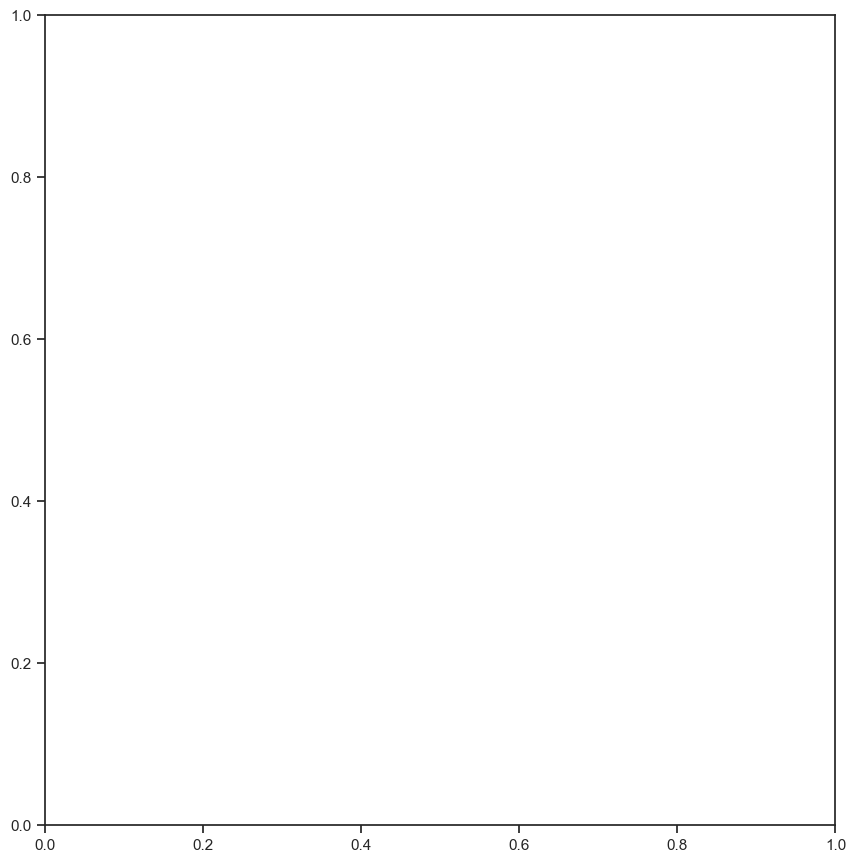

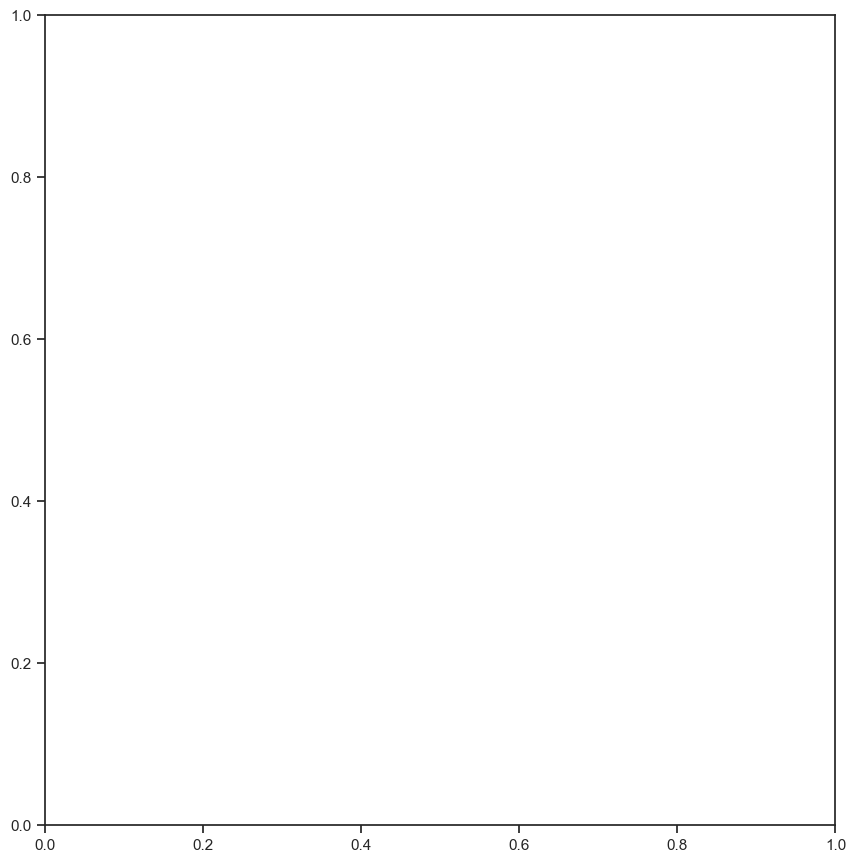

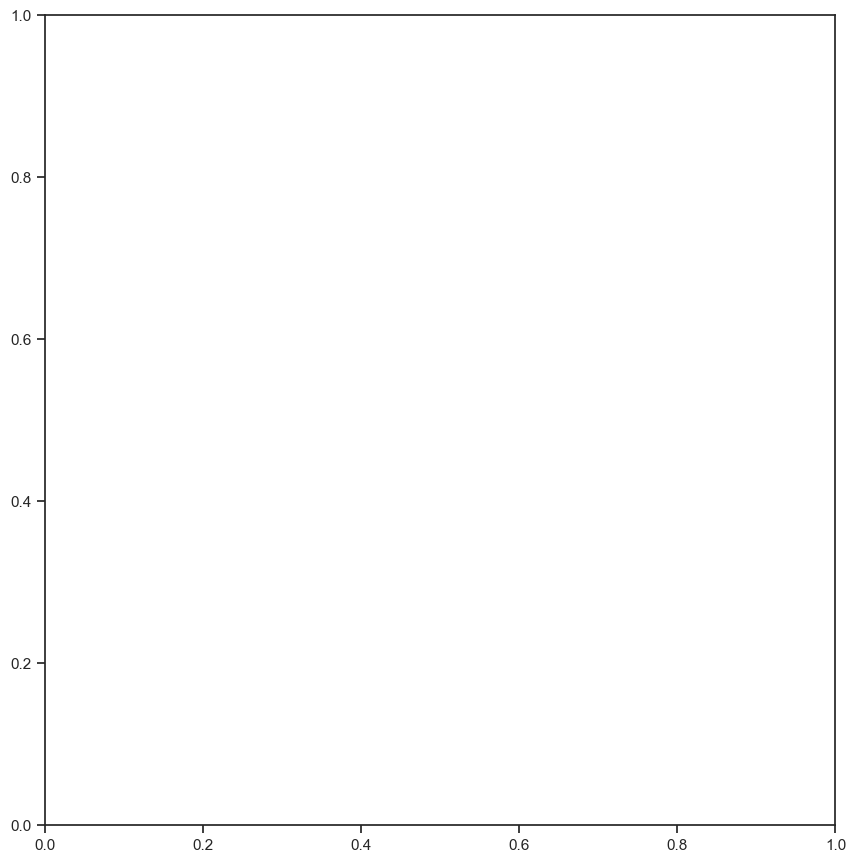

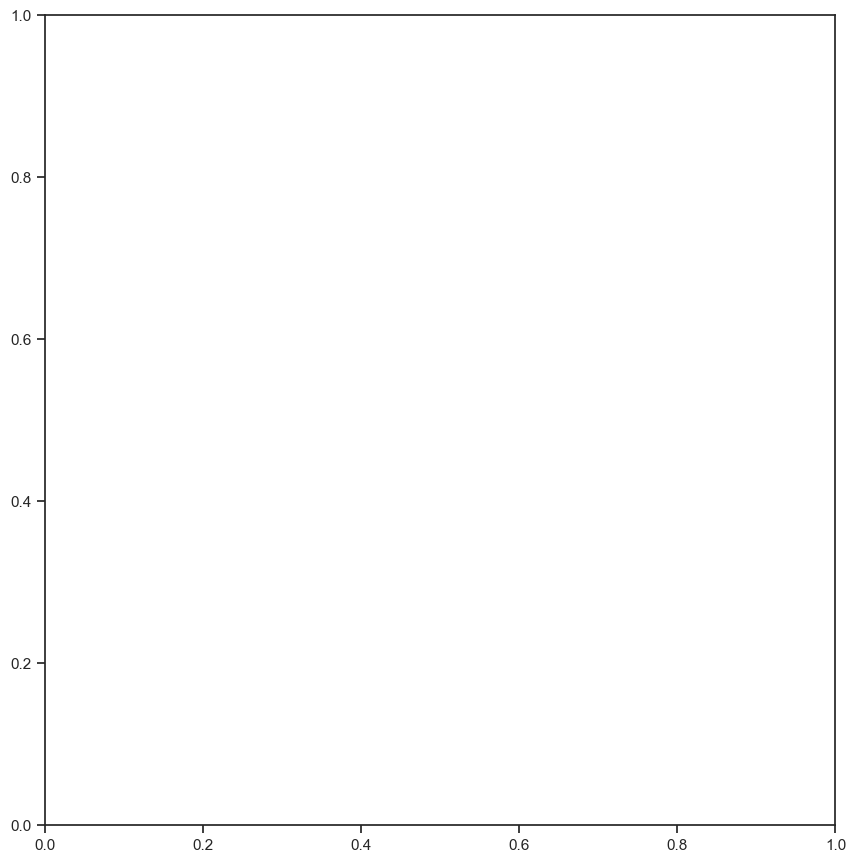

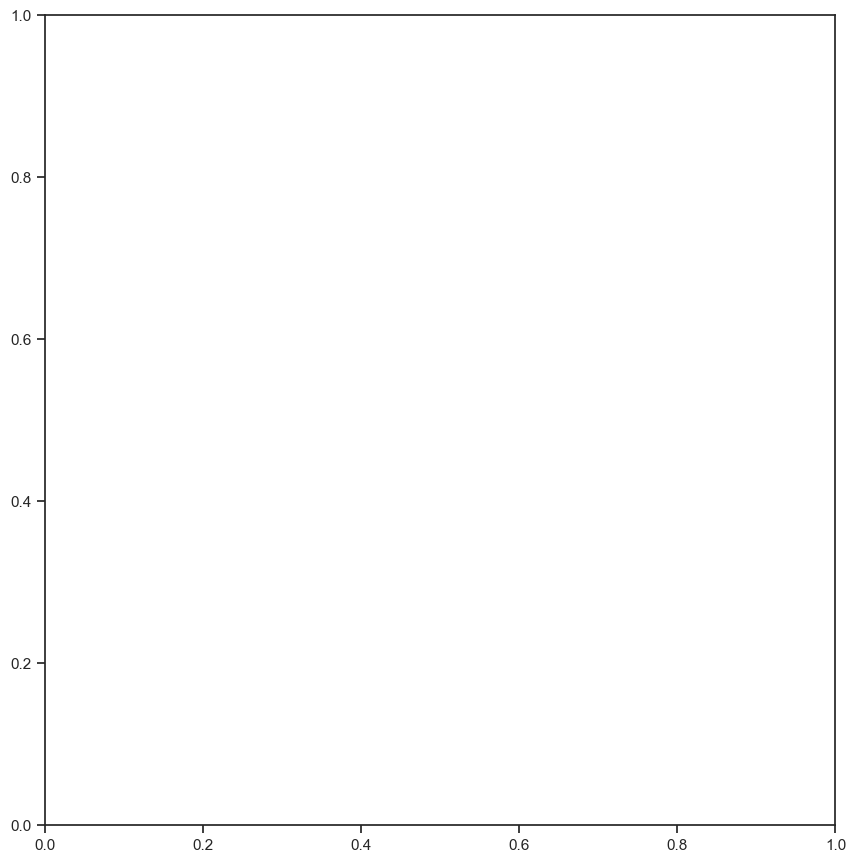

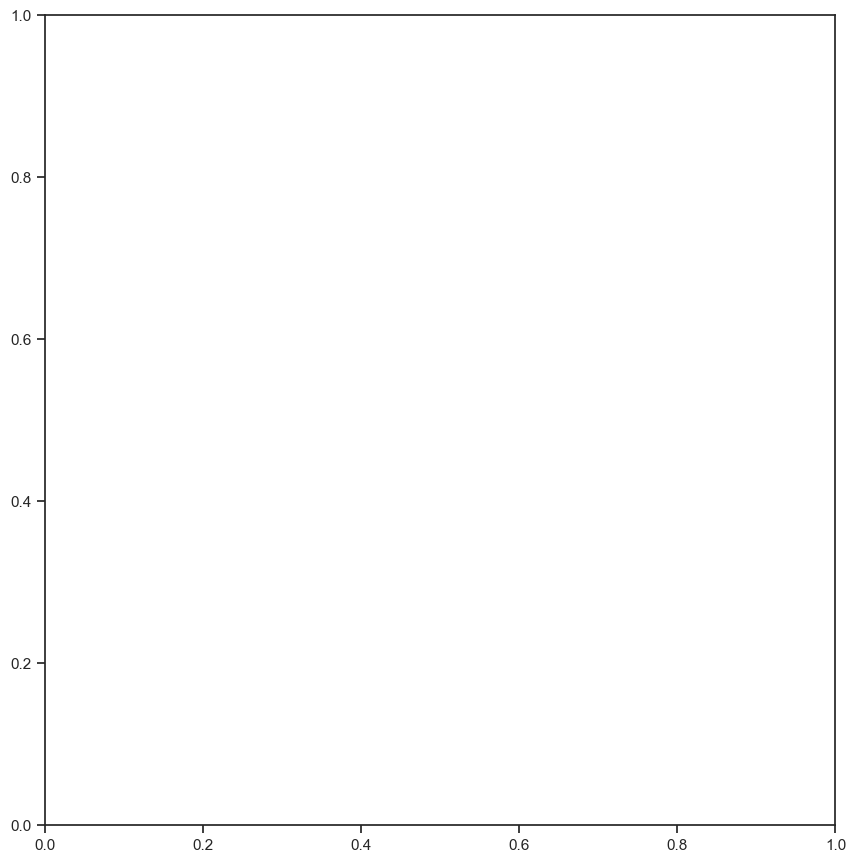

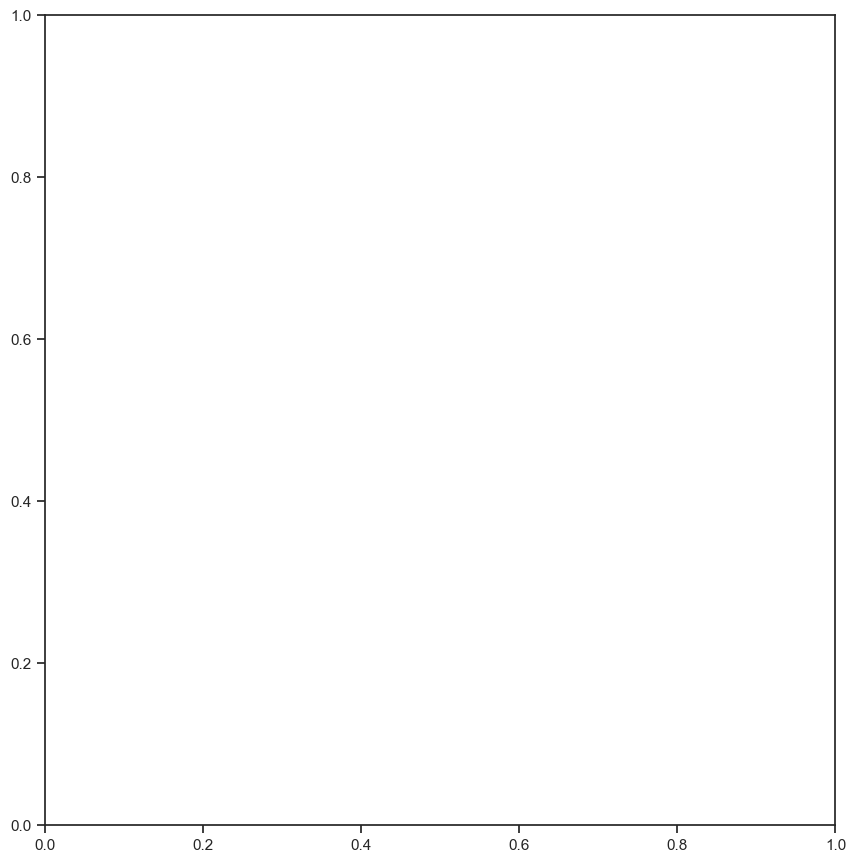

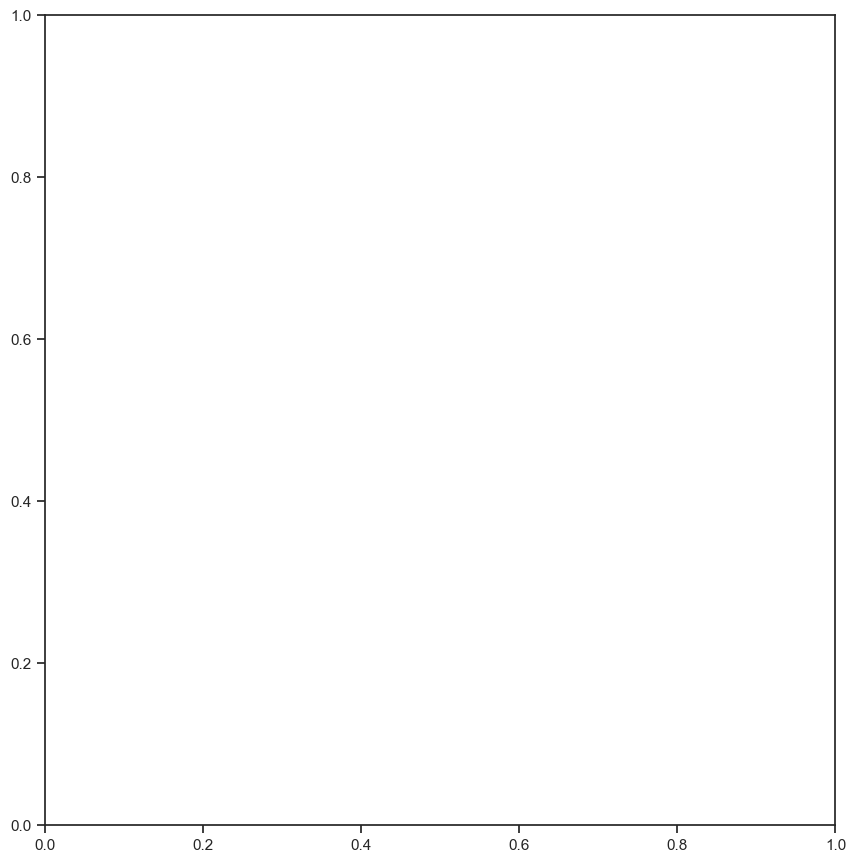

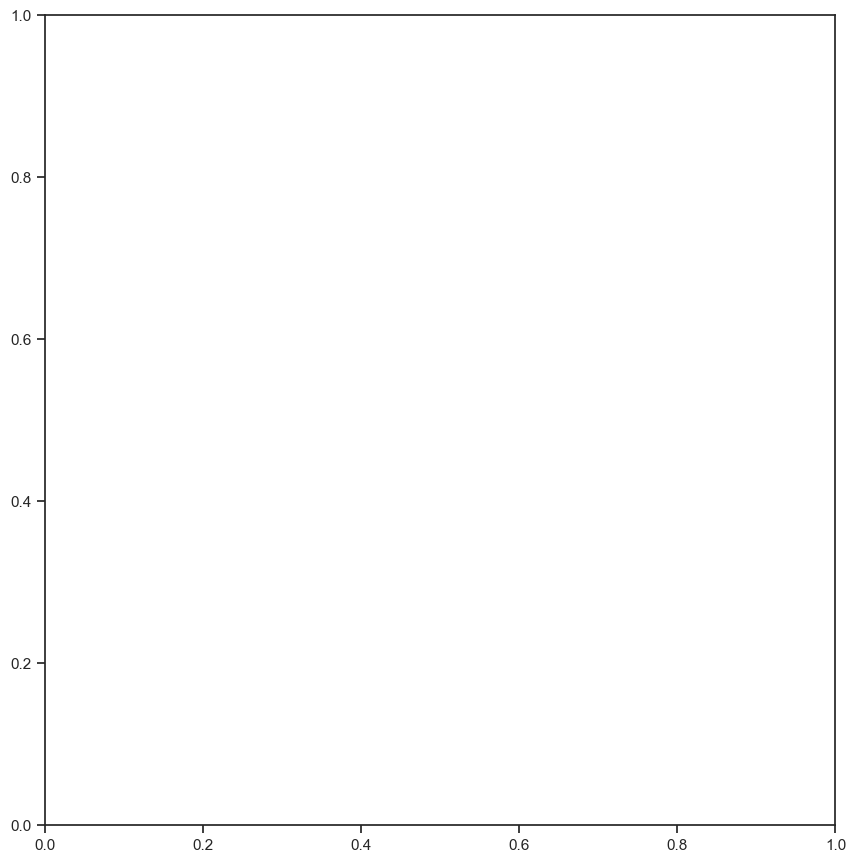

In [11]:
AV = AutoViz_Class()
AV.AutoViz(df_autovis)

In [13]:
df.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week
count,153359.000000,153359.000000,85446.000000,85446.000000,85446.000000
mean,46.525045,2.917722,6.111181,51.533433,8.451443
std,2.372156,2.858865,0.961764,30.321725,2.943627
min,41.370052,-5.098175,1.000000,0.000000,1.000000
25%,44.039191,1.370338,6.000000,28.000000,6.000000
50%,46.679775,2.454220,6.000000,45.000000,7.000000
75%,48.842170,5.100281,7.000000,70.000000,11.000000
max,51.085880,9.549946,7.000000,167.883333,15.000000
